In [2]:
import sys
sys.path.insert(0,'/home/djl34/kl_git/scripts')
from notebook_imports import *
sns.set_style(style='white') 

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [3]:
## to plot the distribution of # of polymorphic sites in a 100bp window

In [3]:
client = Client()

In [4]:
filename = [os.path.join(KL_data_dir, f"whole_genome/filtered_additional/{chrom}.tsv") for chrom in all_chrom_set]
ddf = dd.read_csv(filename, sep = "\t")

In [5]:
ddf.head()

/home/djl34/mambaforge/envs/raklette/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


,window_100bp,polymorphic_y
0,0,99
1,1,86
2,6,50
3,73,39
4,385,33


In [6]:
df = ddf.compute()

In [7]:
df = df.rename({"polymorphic_y": "Number of Mutations"}, axis = 1)

In [10]:
df_small = df[:10000]

In [14]:
type(g)

matplotlib.axes._subplots.AxesSubplot

In [35]:
list(range(0, 140, 20)) + [5]

[0, 20, 40, 60, 80, 100, 120, 5]

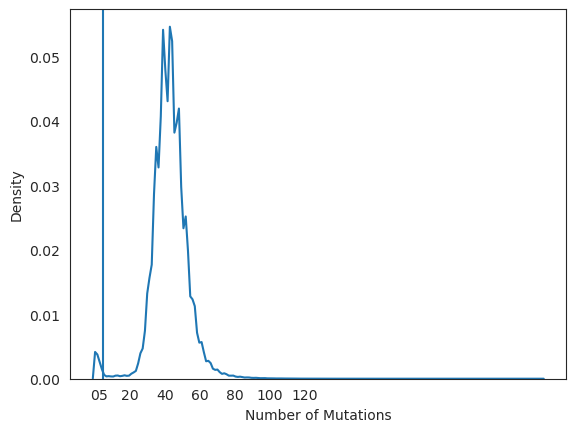

In [37]:
g= sns.kdeplot(data=df, x="Number of Mutations")
plt.axvline(x = 5)
g.set_xticks(list(range(0, 140, 20)) + [5])

plt.savefig("100bp_distribution.svg", format="svg", bbox_inches="tight")

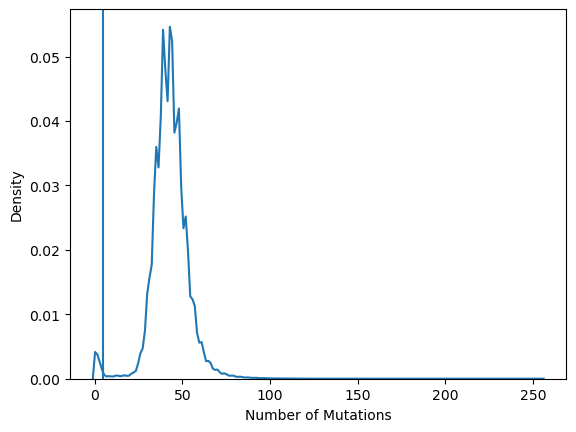

In [12]:

sns.kdeplot(data=df, x="Number of Mutations")
plt.axvline(x = 5)

plt.savefig("100bp_distribution.svg", format="svg", bbox_inches="tight")

In [13]:
len(df[df["Number of Mutations"] <= 5])/len(df)

0.017318426099458117